In [20]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

def calculate_stress(blink, eyebrow, emotion, lips, eyes_direction, hand_movement):

    return (
        0.2 * blink + 0.2 * eyebrow + 0.2 * emotion +
        0.15 * lips + 0.15 * eyes_direction + 0.1 * hand_movement
    )


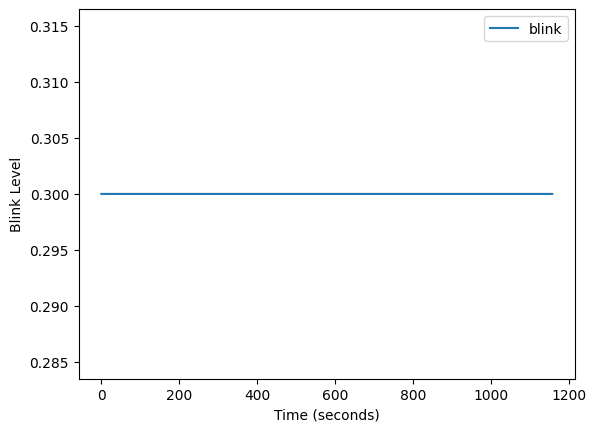

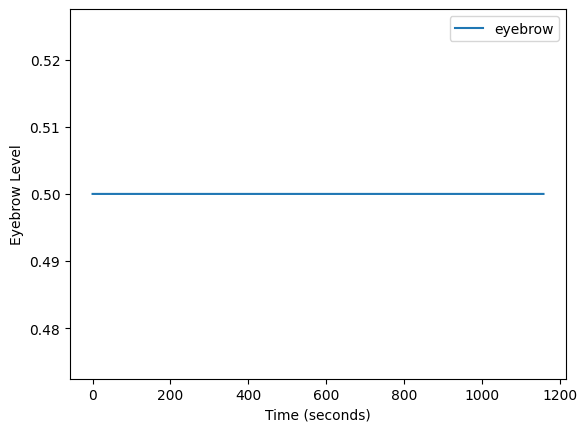

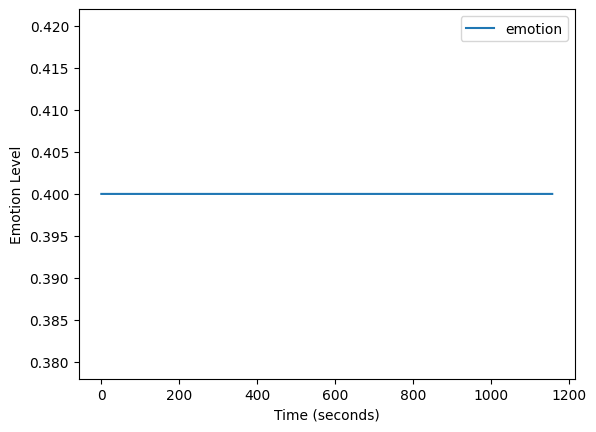

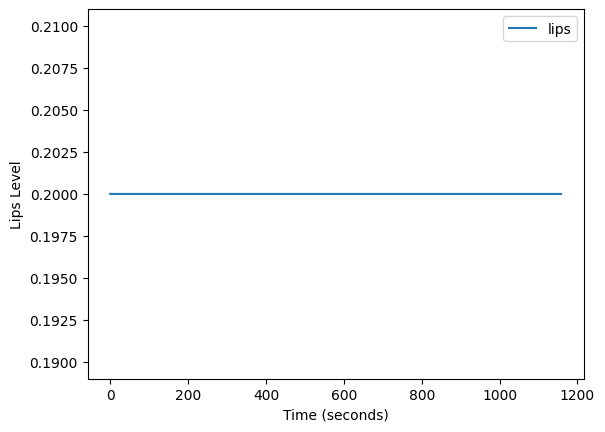

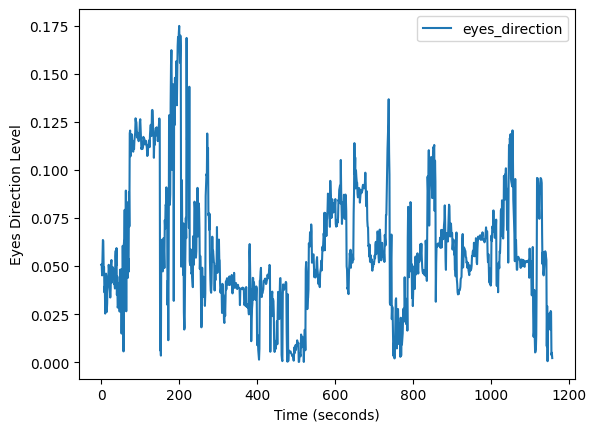

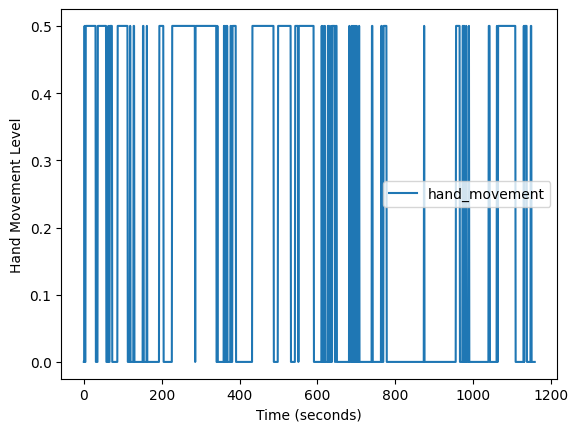

In [27]:
 # this is for Customize the stress

def plot_stress(data, factor, ylabel):
    plt.plot(data[factor], label=factor)
    plt.xlabel('Time (seconds)')
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

def main(video_path):
    cap = cv2.VideoCapture(video_path)

    mp_face = mp.solutions.face_detection
    mp_drawing = mp.solutions.drawing_utils
    mp_hands = mp.solutions.hands

    face_detection = mp_face.FaceDetection(min_detection_confidence=0.2)
    hands = mp_hands.Hands(min_detection_confidence=0.2, min_tracking_confidence=0.2)

    stress_data = {
        "blink": [],
        "eyebrow": [],
        "emotion": [],
        "lips": [],
        "eyes_direction": [],
        "hand_movement": [],
        "overall_stress": []
    }

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # tis is for Face detection
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = face_detection.process(frame_rgb)

        if results.detections:
            # facial features
            landmarks = results.detections[0].location_data.relative_keypoints
            blink = 0.3
            eyebrow = 0.5
            emotion = 0.4
            lips = 0.2

            # Hand detection
            frame_hands = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            hands_results = hands.process(frame_hands)
            if hands_results.multi_hand_landmarks:
                hand_movement = 0.5
            else:
                hand_movement = 0.0

            # Eyes direction
            left_eye_x = landmarks[1].x
            right_eye_x = landmarks[0].x
            eyes_direction = abs(left_eye_x - right_eye_x)

            # Calculate overall stress
            overall_stress = calculate_stress(
                blink, eyebrow, emotion, lips, eyes_direction, hand_movement
            )

            # Save the data
            stress_data["blink"].append(blink)
            stress_data["eyebrow"].append(eyebrow)
            stress_data["emotion"].append(emotion)
            stress_data["lips"].append(lips)
            stress_data["eyes_direction"].append(eyes_direction)
            stress_data["hand_movement"].append(hand_movement)
            stress_data["overall_stress"].append(overall_stress)

    cap.release()

    # Plot
    plot_stress(stress_data, "blink", "Blink Level")
    plot_stress(stress_data, "eyebrow", "Eyebrow Level")
    plot_stress(stress_data, "emotion", "Emotion Level")
    plot_stress(stress_data, "lips", "Lips Level")
    plot_stress(stress_data, "eyes_direction", "Eyes Direction Level")
    plot_stress(stress_data, "hand_movement", "Hand Movement Level")
    plot_stress(stress_data, "overall_stress", "Overall Stress Level")

if __name__ == "__main__":
    video_path = "/content/big_buck_bunny_720p_20mb.mp4 (1).mp4"
    main(video_path)
